In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib notebook

In [486]:
sector = pd.read_csv('10_Industry_Portfolios.CSV', header=6, index_col=0, dtype='a')
sector = sector.iloc[:1127, :]


In [487]:
sector.index = pd.to_datetime(sector.index, format='%Y%m')
sector.index = sector.index.to_period('M')
sector.head()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
1926-07,1.45,15.55,4.69,-1.18,2.90,0.83,0.11,1.77,7.04,2.16
1926-08,3.97,3.68,2.81,3.47,2.66,2.17,-0.71,4.25,-1.69,4.38
1926-09,1.14,4.80,1.15,-3.39,-0.38,2.41,0.21,0.69,2.04,0.29
1926-10,-1.24,-8.23,-3.63,-0.78,-4.58,-0.11,-2.29,-0.57,-2.63,-2.85
1926-11,5.20,-0.19,4.10,0.01,4.71,1.63,6.43,5.42,3.71,2.11


In [488]:
sample = sector['1964-01':'2014-12']
sample = sample.astype('float')
sample

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
1964-01,0.79,1.19,2.69,4.84,2.91,3.35,2.51,3.68,1.40,1.24
1964-02,1.87,2.14,2.76,1.06,1.96,-0.28,1.62,1.66,0.87,5.45
1964-03,3.08,0.93,3.70,1.40,3.38,-0.94,2.43,-1.94,-0.75,2.18
1964-04,-0.48,1.93,-1.72,4.02,-3.63,0.81,2.86,-1.42,1.06,0.26
1964-05,1.56,1.12,1.77,2.14,2.74,-0.40,3.89,0.53,0.84,2.42
...,...,...,...,...,...,...,...,...,...,...
2014-08,5.54,5.20,4.77,2.27,4.28,0.52,5.15,5.43,5.39,4.41
2014-09,-0.08,-9.42,-2.37,-8.01,-1.30,-1.71,-1.43,-0.08,-3.40,-1.01
2014-10,2.64,3.86,2.35,-4.44,1.31,1.41,3.03,5.76,6.69,3.30
2014-11,4.79,4.74,2.23,-9.87,4.25,3.04,7.46,2.66,0.29,2.73


In [489]:
factors = pd.read_csv('F-F_Research_Data_5_Factors_2x3.CSV', header=2, index_col=0)
factors = factors.iloc[:683, :]
factors = factors.astype('float')
factors.index = pd.to_datetime(factors.index, format='%Y%m')
factors.index = factors.index.to_period('M')

In [490]:
factors_insample = factors['1964-01':'2014-12']
factors_insample

,Mkt-RF,SMB,HML,RMW,CMA,RF
1964-01,2.24,0.08,1.59,0.22,1.50,0.30
1964-02,1.54,0.32,2.83,0.06,0.85,0.26
1964-03,1.41,1.41,3.32,-2.01,2.93,0.31
1964-04,0.10,-1.52,-0.55,-1.35,-1.08,0.29
1964-05,1.42,-0.68,1.98,-0.26,0.24,0.26
...,...,...,...,...,...,...
2014-08,4.24,0.29,-0.59,-0.63,-0.70,0.00
2014-09,-1.97,-3.79,-1.23,1.13,-0.51,0.00
2014-10,2.52,3.78,-1.70,-0.47,-0.17,0.00
2014-11,2.55,-2.31,-3.00,1.40,0.18,0.00


In [491]:
excess_return = sample.apply(lambda x: x - factors_insample.iloc[:, -1])
mean = excess_return.mean()
std = excess_return.std()

In [492]:
skeness = excess_return.skew()
kurtosis = excess_return.kurtosis() + 3

In [493]:
import statsmodels.api as sm
from scipy.stats import skewtest, kurtosistest

z, p_skewness = skewtest(excess_return, axis=0)
z, p_kurtosis = kurtosistest(excess_return, axis=0)

sign_skew = pd.Series(['']*len(z))
sign_skew[p_skewness<0.01] = '*'*3
sign_skew[(p_skewness>=0.01)&(p_skewness<0.05)] = '*'*2
sign_skew[(p_skewness>=0.05)&(p_skewness<0.1)] = '*'

sign_kur = pd.Series(['']*len(z))
sign_kur[p_kurtosis<0.01] = '*'*3
sign_kur[(p_kurtosis>=0.01)&(p_kurtosis<0.05)] = '*'*2
sign_kur[(p_kurtosis>=0.05)&(p_kurtosis<0.1)] = '*'

In [494]:
stats = pd.DataFrame()
for i in range(10):
    stat = pd.DataFrame(data={'Sector Portfolio': excess_return.columns[i], 
                              'Mean': mean[i], 'SD': std[i], 'Coefficient of Skewness': '{:.4f}{}({:.4f})'.format(skeness[i], sign_skew[i], p_skewness[i]),
                               'Coefficient of Kurtosis': '{:.4f}{}({:.4f})'.format(kurtosis[i], sign_kur[i], p_kurtosis[i])}, index=[''])
    stats = stats.append(stat)

In [495]:
print('=====================================================================')
print('                     Descriptive Statistics')
print('=====================================================================')

stats

                     Descriptive Statistics


,Sector Portfolio,Mean,SD,Coefficient of Skewness,Coefficient of Kurtosis
,NoDur,0.682990,4.303136,-0.3156***(0.0017),5.1361***(0.0000)
,Durbl,0.455621,6.335915,0.1598(0.1053),7.9583***(0.0000)
,Manuf,0.572190,4.967849,-0.4961***(0.0000),5.6246***(0.0000)
,Enrgy,0.640261,5.418015,-0.0083(0.9324),4.4359***(0.0000)
,HiTec,0.570343,6.532117,-0.2252**(0.0233),4.3122***(0.0000)
,Telcm,0.457696,4.654033,-0.1890*(0.0561),4.2773***(0.0000)
,Shops,0.638431,5.224537,-0.2929***(0.0034),5.4514***(0.0000)
,Hlth,0.688023,4.869590,0.0173(0.8598),5.5476***(0.0000)
,Utils,0.451438,4.046342,-0.1160(0.2383),4.0395***(0.0002)
,Other,0.537026,5.330422,-0.4868***(0.0000),4.8472***(0.0000)


<img src="stats.png" width=600 height=300 />

In [643]:
#dir(results)

In [514]:
import statsmodels.api as sm
def factor_bt(asset, window=36, num_factor=5):
    n = len(excess_return)-window
    alphas = []
    r_s_adjs = []
    pvalues = []
    for i in range(n):
        X = sm.add_constant(factors_insample.iloc[i:(i+window), :num_factor]/100)
        y = excess_return.iloc[i:(i+window), asset]/100

        model = sm.OLS(y, X)
        results = model.fit()
        coef = results.params.values
        pvalue = results.pvalues.values[0]
        r_s_adj = results.rsquared_adj
        
        alpha = coef[0]
        #alpha = (alpha + 1)**12 - 1
        
        alphas.append(alpha)
        r_s_adjs.append(r_s_adj)
        pvalues.append(pvalue)
    
    return np.array(alphas), np.array(r_s_adjs), np.array(pvalues)

In [580]:
ff5_results = pd.DataFrame()
capm_alphas = pd.DataFrame().reindex_like(excess_return.iloc[36:, :])
ff3_alphas = pd.DataFrame().reindex_like(excess_return.iloc[36:, :])
ff5_alphas = pd.DataFrame().reindex_like(excess_return.iloc[36:, :])

capm_rs = pd.DataFrame().reindex_like(excess_return.iloc[36:, :])
ff3_rs = pd.DataFrame().reindex_like(excess_return.iloc[36:, :])
ff5_rs = pd.DataFrame().reindex_like(excess_return.iloc[36:, :])

capm_p = pd.DataFrame().reindex_like(excess_return.iloc[36:, :])
ff3_p = pd.DataFrame().reindex_like(excess_return.iloc[36:, :])
ff5_p = pd.DataFrame().reindex_like(excess_return.iloc[36:, :])

for i in range(10):
    
    alpha1, r_s_adj1, p1 = factor_bt(i, window=36, num_factor=1)
    alpha3, r_s_adj3, p3 = factor_bt(i, window=36, num_factor=3)
    alpha5, r_s_adj5, p5 = factor_bt(i, window=36, num_factor=5)
    
    capm_alphas.iloc[:, i] = alpha1
    ff3_alphas.iloc[:, i] = alpha3
    ff5_alphas.iloc[:, i] = alpha5
    
    capm_rs.iloc[:, i] = r_s_adj1
    ff3_rs.iloc[:, i] = r_s_adj3
    ff5_rs.iloc[:, i] = r_s_adj5
    
    capm_p.iloc[:, i] = p1
    ff3_p.iloc[:, i] = p3
    ff5_p.iloc[:, i] = p5
    
    mean = np.mean(alpha5)
    std = np.std(alpha5)
    ff5_result = pd.DataFrame(data={'Sector Portfolio': excess_return.columns[i], 
                              'Mean(%)': '{:.2%}'.format(mean),
                              'SD(%)': '{:.2%}'.format(std)},
                        index = [''])
    ff5_results = ff5_results.append(ff5_result)

In [499]:
ff5_results

,Sector Portfolio,Mean(%),SD(%)
,NoDur,-0.07%,0.43%
,Durbl,-0.24%,0.55%
,Manuf,-0.05%,0.36%
,Enrgy,0.00%,0.73%
,HiTec,0.41%,0.65%
,Telcm,-0.13%,0.55%
,Shops,0.01%,0.38%
,Hlth,0.38%,0.42%
,Utils,-0.03%,0.52%
,Other,-0.09%,0.27%


<img src="FF5_results.png" width=500 height=200 />

In [517]:
ff5_alphas.index = ff5_alphas.index.to_timestamp()

<IPython.core.display.Javascript object>


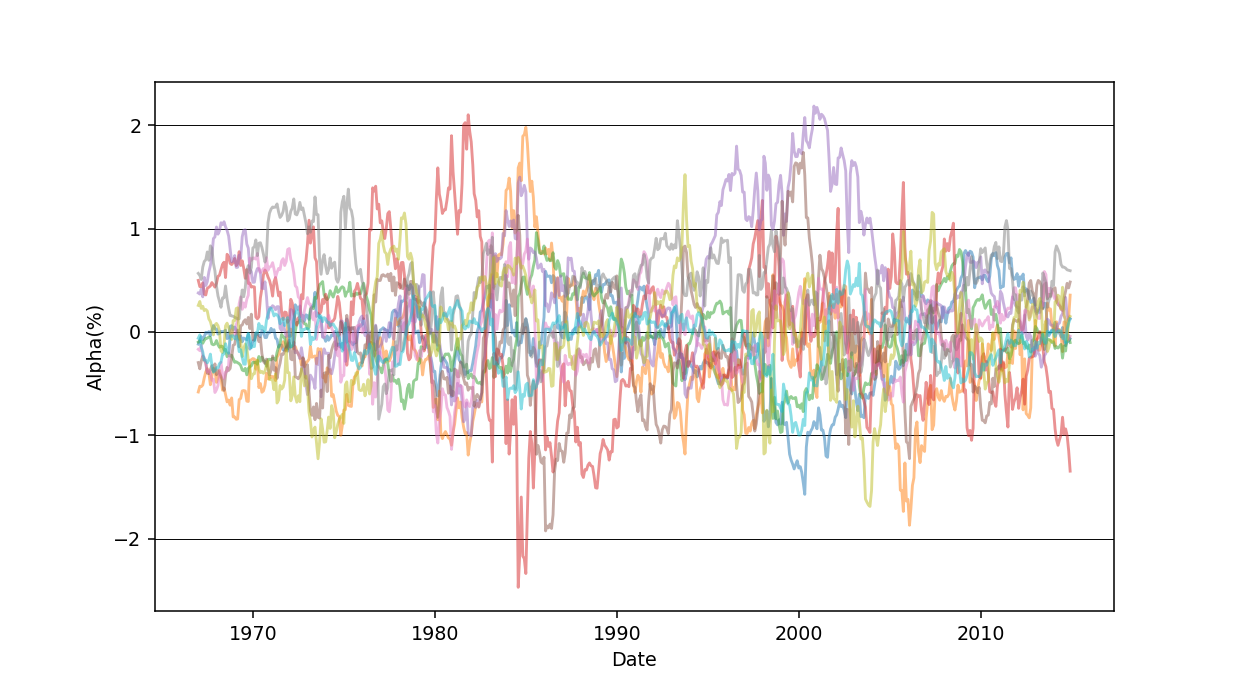

In [518]:
plt.figure(figsize=(9, 5))
plt.plot(ff5_alphas*100, alpha=0.5)
plt.grid(color='black', linestyle='-', linewidth=0.5, axis='y')
plt.xlabel('Date')
plt.ylabel('Alpha(%)');

In [505]:
from scipy.stats import ttest_ind

In [504]:
alphas_diff = pd.DataFrame(index=ff5_alphas.columns, columns=ff5_alphas.columns)

for i in range(10):
    for j in range(i+1, 10):
        t, p = ttest_ind(ff5_alphas.iloc[:, i], ff5_alphas.iloc[:, j], equal_var=False)
        alphas_diff.iloc[i, j] = '{:.4f}'.format(p)
alphas_diff = alphas_diff.fillna('')
alphas_diff

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,,0.0000,0.2444,0.0334,0.0000,0.0523,0.0002,0.0000,0.1266,0.6218
Durbl,,,0.0000,0.0000,0.0000,0.0014,0.0000,0.0000,0.0000,0.0000
Manuf,,,,0.1592,0.0000,0.0024,0.0052,0.0000,0.5556,0.0464
Enrgy,,,,,0.0000,0.0006,0.6889,0.0000,0.3860,0.0086
HiTec,,,,,,0.0000,0.0000,0.3571,0.0000,0.0000
Telcm,,,,,,,0.0000,0.0000,0.0017,0.0719
Shops,,,,,,,,0.0000,0.0863,0.0000
Hlth,,,,,,,,,0.0000,0.0000
Utils,,,,,,,,,,0.0292
Other,,,,,,,,,,


In [585]:
N = len(capm_alphas)

capm_sign = np.sum(capm_p<0.1, axis=0)/N
ff3_sign = np.sum(ff3_p<0.1, axis=0)/N
ff5_sign = np.sum(ff5_p<0.1, axis=0)/N

capm_sign_p = np.sum((capm_p<0.1)&(capm_alphas>0), axis=0)/N
ff3_sign_p = np.sum((ff3_p<0.1)&(ff3_alphas>0), axis=0)/N
ff5_sign_p = np.sum((ff5_p<0.1)&(ff5_alphas>0), axis=0)/N

capm_sign_n = capm_sign - capm_sign_p
ff3_sign_n = ff3_sign - ff3_sign_p
ff5_sign_n = ff5_sign - ff5_sign_p

capm_positive = np.sum(capm_alphas>0, axis=0)/N
ff3_positive = np.sum(ff3_alphas>0, axis=0)/N
ff5_positive = np.sum(ff5_alphas>0, axis=0)/N

capm_n = 1 - capm_positive
ff3_n = 1 - ff3_positive
ff5_n = 1 - ff5_positive

capm_avg_rs = np.mean(capm_rs)
ff3_avg_rs = np.mean(ff3_rs)
ff5_avg_rs = np.mean(ff5_rs)

In [642]:
index = [capm_alphas.columns, ['Jensen Alpha', '3F Alpha', '5F Alpha']]
index = pd.MultiIndex.from_product(index, names=['Sectors', 'Model'])

columns = [('Significant', 'Positive(%)'), ('Significant', 'Negative(%)'), ('Significant', 'Total(%)'), ('Overall', 'Positive(%)'), ('Overall', 'Negative(%)'), ('Adjusted avg R-Squared', '')]
columns = pd.MultiIndex.from_tuples(columns)

sign_alphas = pd.DataFrame(index=index, columns=columns)

In [587]:
capm_results = np.array([capm_sign_p.tolist(), capm_sign_n.tolist(), capm_sign.tolist(), capm_positive.tolist(), capm_n.tolist(), capm_avg_rs.tolist()]).transpose()
ff3_results = np.array([ff3_sign_p.tolist(), ff3_sign_n.tolist(), ff3_sign.tolist(), ff3_positive.tolist(), ff3_n.tolist(), ff3_avg_rs.tolist()]).transpose()
ff5_results = np.array([ff5_sign_p.tolist(), ff5_sign_n.tolist(), ff5_sign.tolist(), ff5_positive.tolist(), ff5_n.tolist(), ff5_avg_rs.tolist()]).transpose()

In [590]:
idx = pd.IndexSlice
sign_alphas.loc[idx[:, 'Jensen Alpha'], :] = capm_results
sign_alphas.loc[idx[:, '3F Alpha'], :] = ff3_results
sign_alphas.loc[idx[:, '5F Alpha'], :] = ff5_results

pd.options.display.float_format = '{:.2%}'.format

sign_alphas

Significant                          Overall              \
                     Positive(%) Negative(%) Total(%) Positive(%) Negative(%)   
Sectors Model                                                                   
NoDur   Jensen Alpha      26.39%       0.87%   27.26%      74.13%      25.87%   
        3F Alpha          19.44%       3.65%   23.09%      73.61%      26.39%   
        5F Alpha           3.65%       6.94%   10.59%      44.27%      55.73%   
Durbl   Jensen Alpha       1.04%      10.76%   11.81%      38.02%      61.98%   
        3F Alpha           3.47%      10.24%   13.72%      26.39%      73.61%   
        5F Alpha           2.60%       8.68%   11.28%      24.48%      75.52%   
Manuf   Jensen Alpha       6.77%       2.60%    9.38%      50.69%      49.31%   
        3F Alpha           6.77%       7.64%   14.41%      48.96%      51.04%   
        5F Alpha          11.63%       8.85%   20.49%      37.15%      62.85%   
Enrgy   Jensen Alpha       4.69%       2.43%    7.12%      69.27%      30.73%   
        3F Alpha           8.68%       2.78%   11.46%      59.90%      40.10%   
        5F Alpha           9.90%       7.47%   17.36%      50.69%      49.31%   
HiTec   Jensen Alpha       5.03%       8.85%   13.89%      42.53%      57.47%   
        3F Alpha          15.10%       3.12%   18.23%      54.86%      45.14%   
        5F Alpha          25.87%       0.87%   26.74%      72.40%      27.60%   
Telcm   Jensen Alpha      11.98%       4.86%   16.84%      59.55%      40.45%   
        3F Alpha           6.60%       2.26%    8.85%      47.40%      52.60%   
        5F Alpha           2.43%       8.16%   10.59%      37.33%      62.67%   
Shops   Jensen Alpha      14.58%       2.43%   17.01%      57.99%      42.01%   
        3F Alpha          13.19%       2.26%   15.45%      62.50%      37.50%   
        5F Alpha           7.99%       2.08%   10.07%      51.74%      48.26%   
Hlth    Jensen Alpha      14.58%       1.22%   15.80%      67.53%      32.47%   
        3F Alpha          23.78%       0.00%   23.78%      88.72%      11.28%   
        5F Alpha          20.66%       0.00%   20.66%      77.95%      22.05%   
Utils   Jensen Alpha      12.15%       1.22%   13.37%      66.84%      33.16%   
        3F Alpha           4.51%       0.69%    5.21%      47.92%      52.08%   
        5F Alpha           3.65%       1.91%    5.56%      50.52%      49.48%   
Other   Jensen Alpha       5.56%       7.12%   12.67%      51.22%      48.78%   
        3F Alpha           0.17%      15.28%   15.45%      26.39%      73.61%   
        5F Alpha           1.04%       7.29%    8.33%      44.10%      55.90%   

                     Adjusted avg R-Squared  
                                             
Sectors Model                                
NoDur   Jensen Alpha                 70.35%  
        3F Alpha                     75.37%  
        5F Alpha                     79.92%  
Durbl   Jensen Alpha                 66.33%  
        3F Alpha                     73.51%  
        5F Alpha                     75.01%  
Manuf   Jensen Alpha                 87.25%  
        3F Alpha                     88.77%  
        5F Alpha                     89.51%  
Enrgy   Jensen Alpha                 43.86%  
        3F Alpha                     52.01%  
        5F Alpha                     58.10%  
HiTec   Jensen Alpha                 75.68%  
        3F Alpha                     83.17%  
        5F Alpha                     85.43%  
Telcm   Jensen Alpha                 54.88%  
        3F Alpha                     58.90%  
        5F Alpha                     61.55%  
Shops   Jensen Alpha                 73.05%  
        3F Alpha                     76.93%  
        5F Alpha                     78.64%  
Hlth    Jensen Alpha                 59.91%  
        3F Alpha                     67.58%  
        5F Alpha                     69.38%  
Utils   Jensen Alpha                 37.17%  
        3F Alpha                     50.19%  
        5F Al

In [395]:
reg_results = pd.DataFrame()
for i in range(10):
    X = sm.add_constant(factors_insample.iloc[:, :3]/100)
    y = excess_return.iloc[:, i]/100

    model = sm.OLS(y, X)
    results = model.fit()
    params = results.params
    pvalues = results.pvalues.values
    
    alpha = params[0]
    #alpha = (1 + params[0])**12 - 1
    sign = pd.Series(['']*4)
    sign[pvalues<0.01] = '*'*3
    sign[(pvalues>=0.01)&(pvalues<0.05)] = '*'*2
    sign[(pvalues>=0.05)&(pvalues<0.1)] = '*'
    
    reg_result = pd.DataFrame(data = {'Sector Portfolio': excess_return.columns[i], 'Alpha': '{:.4f}{}({:.3f})'.format(alpha*100, sign[0], pvalues[0]), 
                               'Market Beta': '{:.4f}{}({:.3f})'.format(params[1], sign[1], pvalues[1]),
                                'SMB Beta': '{:.4f}{}({:.3f})'.format(params[2], sign[2], pvalues[2]),
                                'HML Beta': '{:.4f}{}({:.3f})'.format(params[3], sign[3], pvalues[3]),
                               'Adj R-Squared': '{:.2%}'.format(results.rsquared_adj)}, index = [''])
    reg_results = reg_results.append(reg_result, ignore_index=True)

In [396]:
#results.summary()
reg_results.index = ['']*len(reg_results)
print('==================================================================================')
print('         Regression of 3 factor model with ten sector portfolios')
print('==================================================================================')
reg_results

         Regression of 3 factor model with ten sector portfolios


,Sector Portfolio,Alpha,Market Beta,SMB Beta,HML Beta,Adj R-Squared
,NoDur,0.2237**(0.022),0.8316***(0.000),-0.0348(0.283),0.1404***(0.000),70.03%
,Durbl,-0.3925***(0.006),1.2046***(0.000),0.1543***(0.001),0.5445***(0.000),70.72%
,Manuf,-0.0280(0.688),1.0623***(0.000),0.0294(0.204),0.1600***(0.000),88.52%
,Enrgy,0.1748(0.289),0.8765***(0.000),-0.2093***(0.000),0.2282***(0.000),45.76%
,HiTec,0.1730(0.144),1.1143***(0.000),0.2057***(0.000),-0.5948***(0.000),80.81%
,Telcm,0.0474(0.704),0.8394***(0.000),-0.2082***(0.000),0.1283***(0.004),58.00%
,Shops,0.0919(0.395),0.9867***(0.000),0.1412***(0.000),0.0328(0.398),75.00%
,Hlth,0.4451***(0.000),0.8276***(0.000),-0.2365***(0.000),-0.2884***(0.000),62.72%
,Utils,0.0391(0.757),0.6310***(0.000),-0.1735***(0.000),0.3913***(0.000),42.87%
,Other,-0.2040***(0.003),1.1595***(0.000),0.0625***(0.007),0.3848***(0.000),90.03%


<img src="FF3_results.png" width=600 height=300 />

In [599]:
ff5_reg_results = pd.DataFrame()
for i in range(10):
    X = sm.add_constant(factors_insample.iloc[:, :5]/100)
    y = excess_return.iloc[:, i]/100

    model = sm.OLS(y, X)
    results = model.fit()
    params = results.params
    pvalues = results.pvalues.values
    
    alpha = params[0]
    #alpha = (1 + params[0])**12 - 1
    sign = pd.Series(['']*6)
    sign[pvalues<0.01] = '*'*3
    sign[(pvalues>=0.01)&(pvalues<0.05)] = '*'*2
    sign[(pvalues>=0.05)&(pvalues<0.1)] = '*'
    
    ff5_reg_result = pd.DataFrame(data = {'Sector Portfolio': excess_return.columns[i], 'Alpha': '{:.4f}{}({:.3f})'.format(alpha*100, sign[0], pvalues[0]), 
                               'Market Beta': '{:.4f}{}({:.3f})'.format(params[1], sign[1], pvalues[1]),
                                'SMB Beta': '{:.4f}{}({:.3f})'.format(params[2], sign[2], pvalues[2]),
                                'HML Beta': '{:.4f}{}({:.3f})'.format(params[3], sign[3], pvalues[3]),
                                'RMW Beta': '{:.4f}{}({:.3f})'.format(params[4], sign[4], pvalues[4]),
                                'CMA Beta': '{:.4f}{}({:.3f})'.format(params[5], sign[5], pvalues[5]),
                               'Adj R-Squared': '{:.2%}'.format(results.rsquared_adj)}, index = [''])
    ff5_reg_results = ff5_reg_results.append(ff5_reg_result, ignore_index=True, sort=False)

In [659]:
#results.summary()
ff5_reg_results.index = ['']*len(reg_results)
print('============================================================================================================')
print('                         Regression of 5 factor model with ten sector portfolios')
print('============================================================================================================')
ff5_reg_results

                         Regression of 5 factor model with ten sector portfolios


,Sector Portfolio,Alpha,Market Beta,SMB Beta,HML Beta,RMW Beta,CMA Beta,Adj R-Squared
,NoDur,-0.0870(0.302),0.9193***(0.000),0.1029***(0.000),-0.0482(0.227),0.6169***(0.000),0.4159***(0.000),78.90%
,Durbl,-0.4476***(0.002),1.2148***(0.000),0.1909***(0.000),0.5548***(0.000),0.1647**(0.016),-0.0217(0.832),70.92%
,Manuf,-0.1680**(0.012),1.0979***(0.000),0.1004***(0.000),0.1075***(0.001),0.3190***(0.000),0.1165**(0.013),90.18%
,Enrgy,0.0445(0.792),0.9237***(0.000),-0.1752***(0.002),0.0633(0.428),0.1506*(0.058),0.3615***(0.002),46.55%
,HiTec,0.4459***(0.000),1.0270***(0.000),0.1083***(0.005),-0.3437***(0.000),-0.4343***(0.000),-0.5513***(0.000),83.34%
,Telcm,0.1405(0.265),0.8231***(0.000),-0.2723***(0.000),0.1019*(0.088),-0.2895***(0.000),0.0563(0.525),59.64%
,Shops,-0.0909(0.378),1.0265***(0.000),0.2491***(0.000),0.0196(0.688),0.4860***(0.000),0.0314(0.664),78.57%
,Hlth,0.2428**(0.048),0.8881***(0.000),-0.1546***(0.000),-0.4396***(0.000),0.3661***(0.000),0.3327***(0.000),65.31%
,Utils,-0.0782(0.545),0.6735***(0.000),-0.1429***(0.001),0.2424***(0.000),0.1350**(0.026),0.3265***(0.000),44.10%
,Other,-0.2332***(0.001),1.1569***(0.000),0.1001***(0.000),0.4566***(0.000),0.1709***(0.000),-0.1562***(0.001),90.72%


In [653]:
pd.options.display.float_format = '{:.2f}'.format

data = pd.concat([excess_return, factors_insample], sort=False, axis=1)
data.rename(columns={'Mkt-RF': 'Mkt_RF'}, inplace=True)
data.columns = data.columns.str.rstrip()

In [633]:
import warnings
warnings.filterwarnings("ignore")

In [655]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

def lrtest(llmin, llmax):
    lr = 2 * (llmax - llmin)
    p = stats.chisqprob(lr, 1) # llmax has 1 dof more than llmin
    return lr, p

diagnotics = pd.DataFrame(index=['H0', 'H1', 'H2'], columns=excess_return.columns)
sectors = excess_return.columns
for i in range(10):
    h01 = "{} ~ Mkt_RF + SMB + HML + CMA".format(sectors[i])

    h02 = "{} ~ Mkt_RF + SMB + HML + RMW".format(sectors[i])

    h03 = "{} ~ Mkt_RF + SMB + HML".format(sectors[i])
    
    hypo = [h01, h02, h03]
    # fit the data
    for h in range(3):
        md = smf.mixedlm(hypo[h], data, groups=[1]*len(data))
        mdf = md.fit(reml=False)
        #print(mdf.summary())
        llf = mdf.llf

        # fit time and litter to pig weight
        mdlitter = smf.mixedlm("{} ~ Mkt_RF + SMB + HML + RMW + CMA".format(sectors[i]), data, groups=[1]*len(data))
        mdflitter = mdlitter.fit(reml=False)
        #print(mdflitter.summary())
        llflitter = mdflitter.llf
        
        lr, p = lrtest(llf, llflitter)
        
        if p<0.01:
            sign = '*'*3
        elif p<0.05:
            sign = '*'*2
        elif p<0.1:
            sign = '*'
        else:
            sign = ''
        
        diagnotics.iloc[h, i] = '{:.4f}{}({:.4f})'.format(lr, sign, p)

In [656]:
diagnotics

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
H0,206.1021***(0.0000),5.8207**(0.0158),97.4433***(0.0000),3.6275*(0.0568),63.3650***(0.0000),23.6522***(0.0000),94.0072***(0.0000),39.6715***(0.0000),4.9866**(0.0255),27.2276***(0.0000)
H1,48.0818***(0.0000),0.0456(0.8310),6.2909**(0.0121),9.3404***(0.0022),46.5038***(0.0000),0.4089(0.5226),0.1902(0.6627),15.0106***(0.0001),13.0212***(0.0003),10.3643***(0.0013)
H2,216.7370***(0.0000),6.3585**(0.0117),97.5585***(0.0000),10.9843***(0.0009),88.7046***(0.0000),26.4501***(0.0000),96.5269***(0.0000),46.0415***(0.0000),15.2505***(0.0001),45.7843***(0.0000)
